# Replicate Piantadosi et al (2012) across five languages

**Sean Trott** and **Benjamin Bergen**

Here, we ask whether word length (measured by `#syllables`) predicts `#homophones` across five languages. We also ask about the predictive power of `surprisal`, a measure of the phonotactic plausibility of a wordform. Following Piantadosi et al (2012), we normalized `surprisal` to the length (in `#phones`) of a wordform.

In [12]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
from tqdm import tqdm

import src.utils as utils
import src.config as config

from collections import Counter

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [4]:
TARGET = 'num_homophones'
COVARIATES = [
    'surprisal_normed',
    'num_sylls_est'
]
FORMULA = '{y} ~ {regressors}'.format(y=TARGET, regressors=' + '.join(COVARIATES))

COVARIATE_LABELS = [
    'normalized surprisal', 
    '#syllables']

LANGUAGE = 'English'

In [5]:
def make_aggregated_plot(df, language, syl_column, homophone_column="num_homophones",
                        x_axis="#Syllables", y_axis="#Homophones"):
    
    language_upper = language[0].upper() + language[1:]
    
    """
    
    df_agg_real = utils.agg_homophones_by_syllable(df_processed, 
                                          syl_column=syl_column, 
                                          homophone_column='num_homophones')
    plt.errorbar(df_agg_real['num_sylls'], df_agg_real['mean_homophones'], 
                    yerr=df_agg_real['sem_homophones'], color="red", ecolor="orange")
    """
    plt.title("{lan}: {y} by {x}".format(lan=language_upper, y=y_axis, x=x_axis))
    
    sns.lineplot(data = df_processed,
            x = syl_column,
            y = homophone_column)
    
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    
    ### Set up directories
    if not os.path.exists("Figures/{lan}/replication_results".format(lan=language)):
        print("Creating directory: Figures/{lan}/replication_results".format(lan=language))
        os.mkdir("Figures/{lan}/replication_results".format(lan=language))
    plt.savefig("Figures/{l1}/replication_results/{l2}_{y}_{x}.png".format(l1=language,
                                                                               l2=language,
                                                                               y=y_axis,
                                                                               x=x_axis),
                dpi=300)

## Replicate in English, German, and Dutch

### English

In [6]:
language = 'english'

In [7]:
# Here, we ignore the artificial lexica
df_og, df_processed, _ = utils.load_lexicons_for_language("english")

/Users/seantrott/Dropbox/UCSD/Research/Ambiguity/Evolution/homophone_simulations/src/utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['remove'] = df[word_column].apply(remove_word)


In [8]:
len(df_og)

52438

In [9]:
len(df_processed)

35107

In [10]:
utils.get_stats_for_lexicon(df_processed)

{'homophone_percentage': 0.1564,
 'mean_homophones': 0.1931,
 'max_homophones': 7,
 'mean_mp': 1.9914,
 'max_mp': 35,
 'total_mp': 69911,
 'mean_mp_w_hp': 3.403,
 'max_mp_w_hp': 98,
 'total_mp_w_hp': 119469}

In [11]:
df_processed['surprisal_normed'] = df_processed['surprisal'] / df_processed['num_phones']

In [14]:
Counter(df_og['num_sylls_est'])

Counter({1: 7855,
         2: 19198,
         3: 15165,
         4: 7124,
         5: 2223,
         6: 670,
         7: 165,
         8: 25,
         10: 5,
         9: 7,
         12: 1})

#### Main analysis

In [15]:
result_real = sm.poisson(formula=FORMULA, 
                         data=df_processed).fit(disp=0)
result_real.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:         num_homophones   No. Observations:                35107
Model:                        Poisson   Df Residuals:                    35104
Method:                           MLE   Df Model:                            2
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                  0.1427
Time:                        14:26:15   Log-Likelihood:                -16316.
converged:                       True   LL-Null:                       -19033.
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.8380      0.060    -13.990      0.000      -0.955      -0.721
surprisal_normed     0.7815      0.030     26.118      0.000       0.723       0.840
num_sylls_est       -0.7171      0.018    -39.926      0.000      -0.752      -0.682
====================================================================================
"""

#### Visualization

/Users/seantrott/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


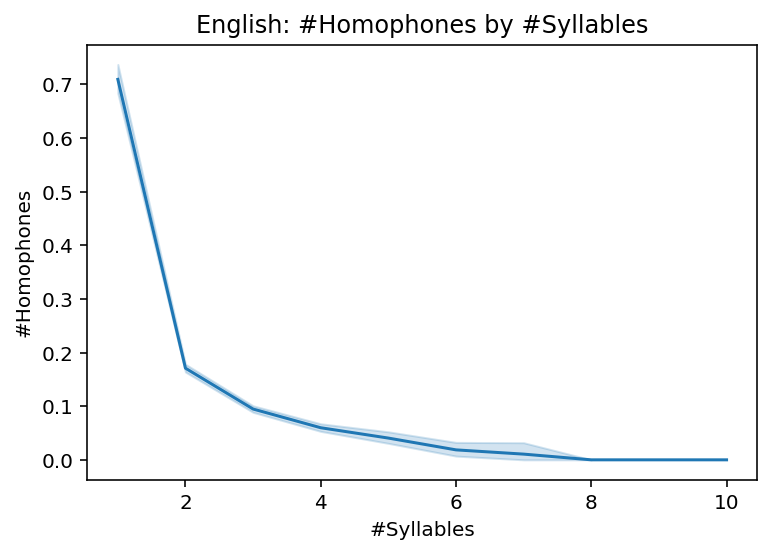

In [16]:
make_aggregated_plot(df_processed,
                    language='english',
                    syl_column="num_sylls_est",
                    homophone_column="num_homophones",
                    x_axis="#Syllables")

### German

In [42]:
language = "german"

In [43]:
# Here, we ignore the artificial lexica
df_og, df_processed, _ = utils.load_lexicons_for_language("german")

/Users/seantrott/Dropbox/UCSD/Research/Ambiguity/Evolution/homophone_simulations/src/utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['remove'] = df[word_column].apply(remove_word)


In [44]:
len(df_og)

51719

In [45]:
len(df_processed)

50474

In [46]:
utils.get_stats_for_lexicon(df_processed)

{'homophone_percentage': 0.023,
 'mean_homophones': 0.0246,
 'max_homophones': 4,
 'mean_mp': 0.7739,
 'max_mp': 21,
 'total_mp': 39061,
 'mean_mp_w_hp': 0.8549,
 'max_mp_w_hp': 29,
 'total_mp_w_hp': 43149}

In [47]:
df_processed['surprisal_normed'] = df_processed['surprisal'] / df_processed['num_phones']

#### Main analysis

In [48]:
result_real = sm.poisson(formula=FORMULA, 
                         data=df_processed).fit(disp=0)
result_real.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:         num_homophones   No. Observations:                50474
Model:                        Poisson   Df Residuals:                    50471
Method:                           MLE   Df Model:                            2
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                 0.09039
Time:                        14:30:48   Log-Likelihood:                -5382.1
converged:                       True   LL-Null:                       -5917.0
                                        LLR p-value:                5.405e-233
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.2375      0.134    -16.685      0.000      -2.500      -1.975
surprisal_normed     0.7177      0.064     11.191      0.000       0.592       0.843
num_sylls_est       -0.7657      0.037    -20.537      0.000      -0.839      -0.693
====================================================================================
"""

#### Visualization

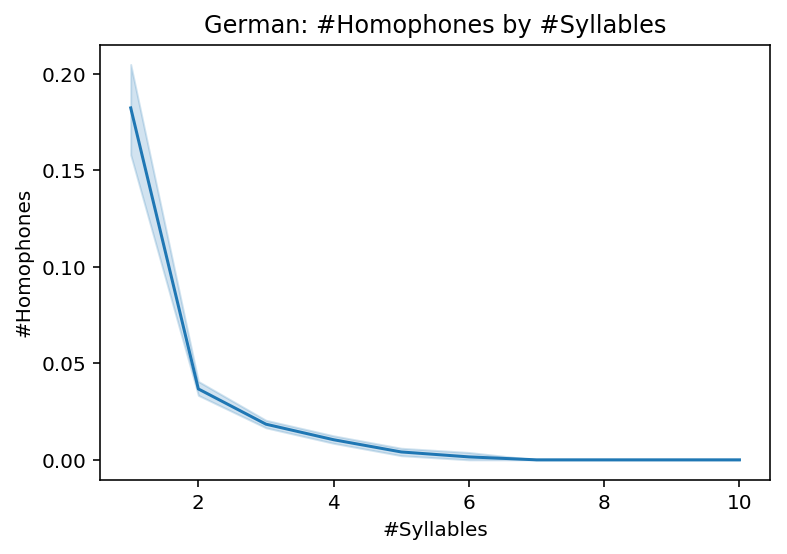

In [49]:
make_aggregated_plot(df_processed,
                    language='german',
                    syl_column="num_sylls_est",
                    homophone_column="num_homophones",
                    x_axis="#Syllables")

### Dutch

In [50]:
language = 'dutch'

In [51]:
# Here, we ignore the artificial lexica
df_og, df_processed, _ = utils.load_lexicons_for_language("dutch")

In [52]:
len(df_og)

67910

In [53]:
len(df_processed)

65351

In [54]:
utils.get_stats_for_lexicon(df_processed)

{'homophone_percentage': 0.0292,
 'mean_homophones': 0.0342,
 'max_homophones': 5,
 'mean_mp': 1.1584,
 'max_mp': 35,
 'total_mp': 75701,
 'mean_mp_w_hp': 1.4446,
 'max_mp_w_hp': 64,
 'total_mp_w_hp': 94405}

In [55]:
df_processed['surprisal_normed'] = df_processed['surprisal'] / df_processed['num_phones']

#### Main analysis

In [56]:
result_real = sm.poisson(formula=FORMULA, 
                         data=df_processed).fit(disp=0)
result_real.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:         num_homophones   No. Observations:                65351
Model:                        Poisson   Df Residuals:                    65348
Method:                           MLE   Df Model:                            2
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                  0.1866
Time:                        14:31:10   Log-Likelihood:                -8152.0
converged:                       True   LL-Null:                       -10022.
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.4618      0.095    -15.464      0.000      -1.647      -1.277
surprisal_normed     0.9182      0.039     23.701      0.000       0.842       0.994
num_sylls_est       -1.1865      0.033    -36.466      0.000      -1.250      -1.123
====================================================================================
"""

#### Visualization

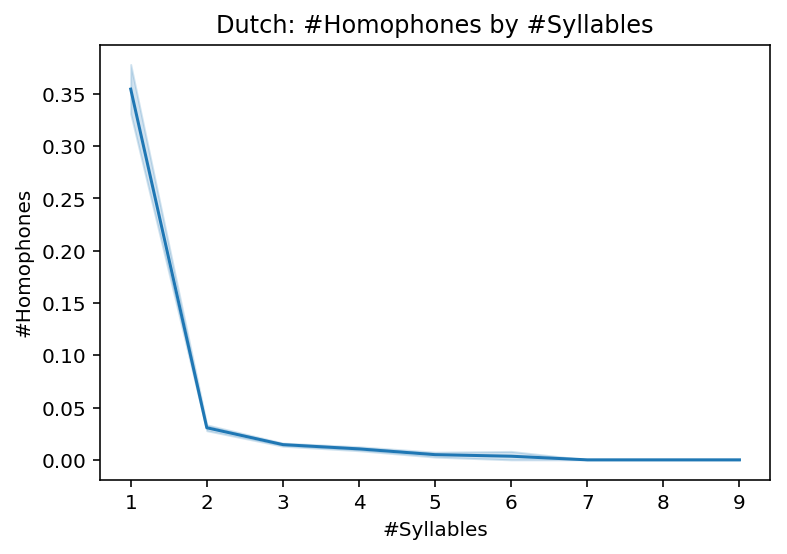

In [57]:
make_aggregated_plot(df_processed,
                    language='dutch',
                    syl_column="num_sylls_est",
                    homophone_column="num_homophones",
                    x_axis="#Syllables")

## Extend to French and Japanese

### French

In [59]:
language = "french"

In [60]:
# Here, we ignore the artificial lexica
df_og, df_processed, _ = utils.load_lexicons_for_language(language,
                                                         phon_column=config.PHON_COLUMN[language],
                                                         word_column=config.WORD_COLUMN[language])

In [61]:
len(df_og)

47310

In [62]:
len(df_processed)

37278

In [63]:
utils.get_stats_for_lexicon(df_processed)

{'homophone_percentage': 0.1434,
 'mean_homophones': 0.1745,
 'max_homophones': 12,
 'mean_mp': 1.9556,
 'max_mp': 39,
 'total_mp': 72901,
 'mean_mp_w_hp': 2.8871,
 'max_mp_w_hp': 97,
 'total_mp_w_hp': 107624}

In [64]:
df_processed['surprisal_normed'] = df_processed['surprisal'] / df_processed['num_phones']

#### Main analysis

In [65]:
result_real = sm.poisson(formula=FORMULA, 
                         data=df_processed).fit(disp=0)
result_real.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:         num_homophones   No. Observations:                37278
Model:                        Poisson   Df Residuals:                    37275
Method:                           MLE   Df Model:                            2
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                 0.05951
Time:                        14:31:31   Log-Likelihood:                -17749.
converged:                       True   LL-Null:                       -18873.
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.9335      0.060    -32.049      0.000      -2.052      -1.815
surprisal_normed     0.9234      0.029     32.310      0.000       0.867       0.979
num_sylls_est       -0.2573      0.015    -17.206      0.000      -0.287      -0.228
====================================================================================
"""

#### Visualization

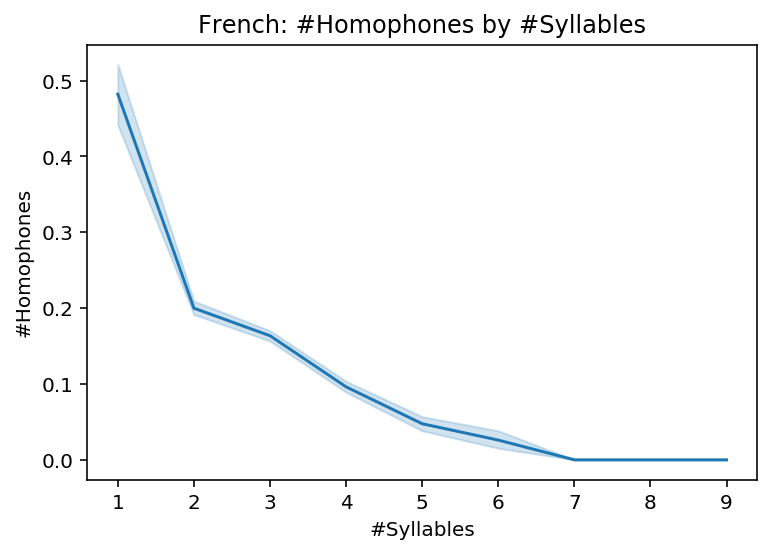

In [66]:
make_aggregated_plot(df_processed,
                    language='french',
                    syl_column="num_sylls_est",
                    homophone_column="num_homophones",
                    x_axis="#Syllables")

### Japanese

In [67]:
language = "japanese"

In [68]:
# Here, we ignore the artificial lexica
df_og, df_processed, _ = utils.load_lexicons_for_language(language,
                                                         phon_column=config.PHON_COLUMN[language],
                                                         word_column=config.WORD_COLUMN[language])

In [69]:
len(df_og)

51147

In [70]:
len(df_processed)

40449

In [71]:
utils.get_stats_for_lexicon(df_processed)

{'homophone_percentage': 0.1506,
 'mean_homophones': 0.2645,
 'max_homophones': 33,
 'mean_mp': 3.9055,
 'max_mp': 43,
 'total_mp': 157972,
 'mean_mp_w_hp': 7.6132,
 'max_mp_w_hp': 273,
 'total_mp_w_hp': 307946}

In [73]:
df_processed['surprisal_normed'] = df_processed['surprisal'] / df_processed['num_phones']

#### Main analysis

In [74]:
result_real = sm.poisson(formula=FORMULA, 
                         data=df_processed).fit(disp=0)
result_real.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:         num_homophones   No. Observations:                40449
Model:                        Poisson   Df Residuals:                    40446
Method:                           MLE   Df Model:                            2
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                  0.2042
Time:                        14:31:53   Log-Likelihood:                -24128.
converged:                       True   LL-Null:                       -30318.
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.3538      0.058     23.439      0.000       1.241       1.467
surprisal_normed     0.3472      0.024     14.193      0.000       0.299       0.395
num_sylls_est       -0.9041      0.013    -71.438      0.000      -0.929      -0.879
====================================================================================
"""

#### Visualization

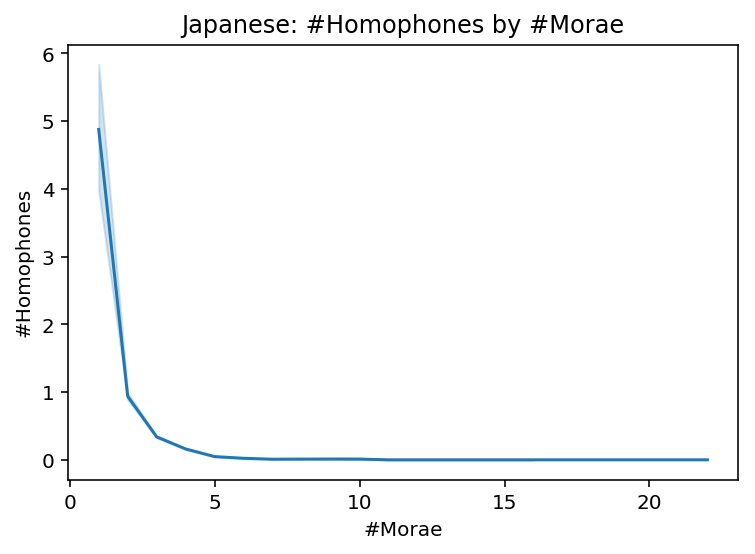

In [75]:
make_aggregated_plot(df_processed,
                    language='japanese',
                    syl_column="num_sylls_est",
                    homophone_column="num_homophones",
                    x_axis="#Morae")